In [1]:
#!python3

#load library
import time #menghitung waktu
import pickle #tipe data menyimpan model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier #metode belajar
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split #proses belajar
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report #hasil belajar

In [2]:
data = pd.read_csv('Prediction Insurance.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [3]:
data.shape

(381109, 12)

In [4]:
data['Region_Code'].unique()

array([28,  3, 11, 41, 33,  6, 35, 50, 15, 45,  8, 36, 30, 26, 16, 47, 48,
       19, 39, 23, 37,  5, 17,  2,  7, 29, 46, 27, 25, 13, 18, 20, 49, 22,
       44,  0,  9, 31, 12, 34, 21, 10, 14, 38, 24, 40, 43, 32,  4, 51, 42,
        1, 52], dtype=int64)

In [5]:
# check missing value
missing_values = data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing,
    'data type' : data.dtypes
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
id,0,0.0,int64
Gender,0,0.0,object
Age,0,0.0,int64
Driving_License,0,0.0,int64
Region_Code,0,0.0,int64
Previously_Insured,0,0.0,int64
Vehicle_Age,0,0.0,object
Vehicle_Damage,0,0.0,object
Annual_Premium,0,0.0,int64
Policy_Sales_Channel,0,0.0,int64


In [6]:
#data preprocessing
data = data.drop('id', axis=1)

data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
# df_region = pd.get_dummies(data['Region_Code'])

df = data[['Gender','Age','Driving_License','Response']]#.merge(df_region, left_index=True, right_index=True)
df.head()

,Gender,Age,Driving_License,Response
0,1,44,1,1
1,1,76,1,0
2,1,47,1,1
3,1,21,1,0
4,0,29,1,0


In [7]:
X = df.drop('Response', axis=1) #inputan
y = df['Response'] #outputan

In [8]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=46)

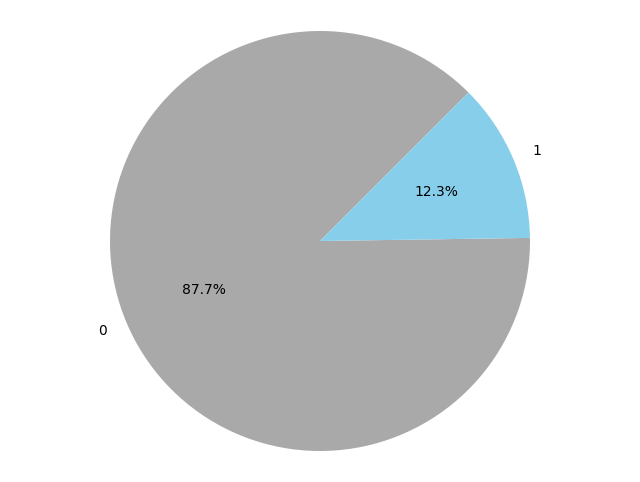

In [9]:
# Calculate class distribution in y_train
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', startangle=45, colors=['darkgrey','skyblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
print("Before Oversampling: ",Counter(y_train))

Before Oversampling:  Counter({0: 267495, 1: 37392})


In [12]:
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [13]:
print("After Oversampling: ",Counter(y_train))

After Oversampling:  Counter({0: 267495, 1: 267495})


In [14]:
#data modelling
#start = time.time()
#model = KNeighborsClassifier(n_neighbors=11)

#hasil belajar
#model.fit(X_train, y_train)
#stop = time.time()
#print(f"Training Time {stop-start} Sekon.....")

In [15]:
#data modelling
start = time.time()
model2 = LogisticRegression(penalty='l2')

#hasil belajar
model2.fit(X_train, y_train)
stop = time.time()
print(f"Training Time {stop-start} Sekon.....")

Training Time 0.7584619522094727 Sekon.....


In [16]:
#data modelling
start = time.time()
model3 = GaussianNB(var_smoothing=1e-9)

#hasil belajar
model3.fit(X_train, y_train)
stop = time.time()
print(f"Training Time {stop-start} Sekon.....")

Training Time 0.15130233764648438 Sekon.....


In [17]:
#model export
#with open('modelKNN.pkl','wb') as file:
    #pickle.dump(model, file)

In [18]:
#model export
with open('modelLR.pkl','wb') as file:
    pickle.dump(model2, file)

In [19]:
#model export
with open('modelNB.pkl','wb') as file:
    pickle.dump(model3, file)

In [20]:
#model evaluation
#y_pred = model.predict(X_test)
#knn = confusion_matrix(y_test, y_pred)
#scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
#print(classification_report(y_test, y_pred))

In [21]:
#model evaluation
y_pred = model2.predict(X_test)
scores = cross_val_score(model2, X_train, y_train, cv = 5, scoring='accuracy')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73     66904
           1       0.17      0.58      0.26      9318

    accuracy                           0.60     76222
   macro avg       0.54      0.59      0.50     76222
weighted avg       0.82      0.60      0.67     76222



In [22]:
#model evaluation
y_pred = model3.predict(X_test)
scores = cross_val_score(model3, X_train, y_train, cv = 5, scoring='accuracy')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.34      0.50     66904
           1       0.16      0.91      0.27      9318

    accuracy                           0.41     76222
   macro avg       0.56      0.63      0.39     76222
weighted avg       0.87      0.41      0.48     76222

